# My solution

I start by getting the data into a pandas dataframe and doing some exploratory data analysis

## Exploratory data analysis

In [101]:
import pandas as pd

data = pd.read_csv("CCPP_data.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [102]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


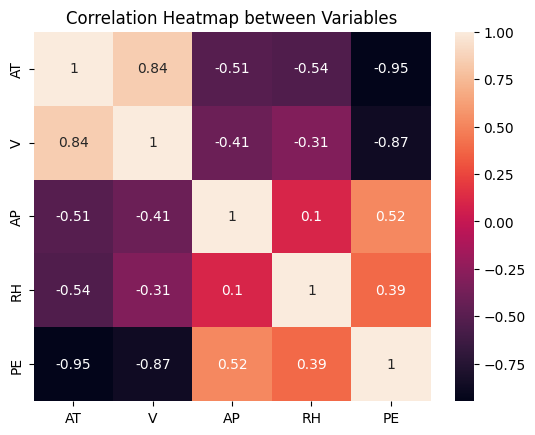

In [104]:
corr_matrix = data.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figsize=(10,8)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap between Variables')
plt.show()


## Results of Exploratory Data Analysis

1. Five numerical variables with high variance in range & scale
2. Zero null values in dataset
3. High correlations exist between:
    - V & AT (0.84)
    - PE & AT (-0.95)
    - PE & V (-0.87)



## Prepare the data

Features: AT, V, AP, RH

Target: PE - Net hourly electrical energy output

In [105]:
# Separate into features and target data

X = data[['AT','V','AP','RH']]
y = data['PE']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)



## Model 1: Linear regression

I will start out with linear regression. This is a good base model to start with as it is explainable, and allows me to understand the influence of each varable on the target value. As a simple model it is a good starting point.

In [106]:
# Linear regression

# Train model on scaled training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate based on training data
y_train_pred = model.predict(X_train_scaled)
rmse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("TRAINING PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TEST PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')



TRAINING PERFORMANCE
Root Mean Squared Error (RMSE): 20.89
R-squared (R2): 0.93
TEST PERFORMANCE
Root Mean Squared Error (RMSE): 20.27
R-squared (R2): 0.93


### Linear regression results

R-squared value of 0.93 is a good start

It is likely that there are non linear relationships between these features and the target 



## Model 2: Decision Tree

Next I will try a decision tree, as it enables me to explore non linear relationships and is still easily explainable

In [107]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

# Train model on scaled training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate based on training data
y_train_pred = model.predict(X_train_scaled)
rmse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("TRAINING PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TEST PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

TRAINING PERFORMANCE
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
TEST PERFORMANCE
Root Mean Squared Error (RMSE): 19.64
R-squared (R2): 0.93


### Decision tree results

R-squared value of 1.00 is good. Too good

Test performance drops off considerably to 0.93, indicating that this model suffered from overfitting


## Model 3: Random forest

The third and final model I will try is Random Forest. It handles complex non linear relationships well and is less likely to overfit

In [108]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

# Train model on scaled training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate based on training data
y_train_pred = model.predict(X_train_scaled)
rmse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("TRAINING PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TEST PERFORMANCE")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

TRAINING PERFORMANCE
Root Mean Squared Error (RMSE): 1.64
R-squared (R2): 0.99
TEST PERFORMANCE
Root Mean Squared Error (RMSE): 10.52
R-squared (R2): 0.96


### Random forest results

R-squared value of 0.96 is the best results I have achieved across all three models

96% of the variance in the target variable is predictable from the features